<a href="https://colab.research.google.com/github/kartoone/cosc470s24/blob/main/examplecode/matplotlib_nn_weights_and_biases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/MichalDanielDobrzanski/DeepLearningPython nn
%cd nn

Cloning into 'nn'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 63 (delta 1), reused 3 (delta 0), pack-reused 55
Receiving objects: 100% (63/63), 16.43 MiB | 19.89 MiB/s, done.
Resolving deltas: 100% (28/28), done.
/content/nn


In [ ]:
# this code depends on having executed the previous cell
# (i.e., you need to have cloned the nn code and cd'ed into it)
import network
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)

(784, 1)
(28, 28)


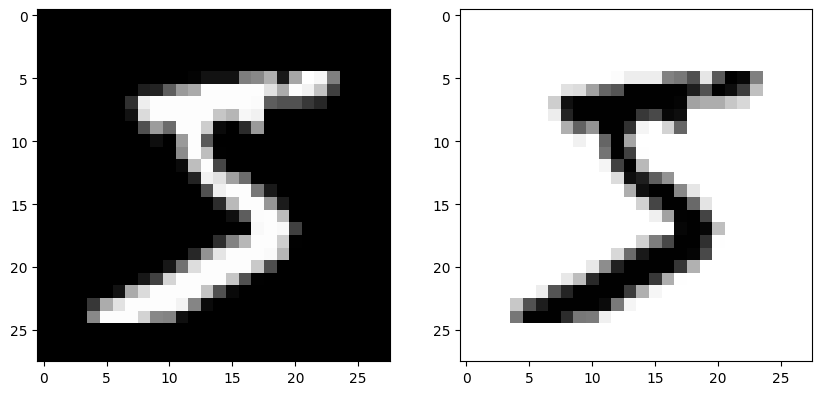

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
print(np.shape(training_data[0][0]))

# reshape the training_img so that it's a 2d 28x28 image instead of a flat 784 pixel line
training_img_0 = np.reshape(training_data[0][0], (28,28))
print(np.shape(training_img_0))

# setup our figure area size
fig, axs = plt.subplots(1, 2, figsize=(10,5))

# plot using the normal grayscale mapping to see the true nature of the input training data
# in the left column of our figure
axs[0].imshow(training_img_0, cmap='gray', vmin=0, vmax=1)

# now use the "reverse" color map "gray_r" to display it the way humans expect this kind of data to look like
axs[1].imshow(training_img_0, cmap='gray_r', vmin=0, vmax=1)


In [ ]:
import numpy as np
np.set_printoptions(linewidth=5000)
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)


Epoch 0 : 9034 / 10000
Epoch 1 : 9164 / 10000
Epoch 2 : 9277 / 10000
Epoch 3 : 9302 / 10000
Epoch 4 : 9349 / 10000
Epoch 5 : 9349 / 10000
Epoch 6 : 9397 / 10000
Epoch 7 : 9432 / 10000
Epoch 8 : 9441 / 10000
Epoch 9 : 9470 / 10000
Epoch 10 : 9471 / 10000
Epoch 11 : 9482 / 10000
Epoch 12 : 9490 / 10000
Epoch 13 : 9503 / 10000
Epoch 14 : 9496 / 10000
Epoch 15 : 9474 / 10000
Epoch 16 : 9522 / 10000
Epoch 17 : 9481 / 10000
Epoch 18 : 9529 / 10000
Epoch 19 : 9499 / 10000
Epoch 20 : 9538 / 10000
Epoch 21 : 9513 / 10000
Epoch 22 : 9519 / 10000
Epoch 23 : 9532 / 10000
Epoch 24 : 9518 / 10000
Epoch 25 : 9526 / 10000
Epoch 26 : 9508 / 10000
Epoch 27 : 9501 / 10000
Epoch 28 : 9515 / 10000
Epoch 29 : 9525 / 10000


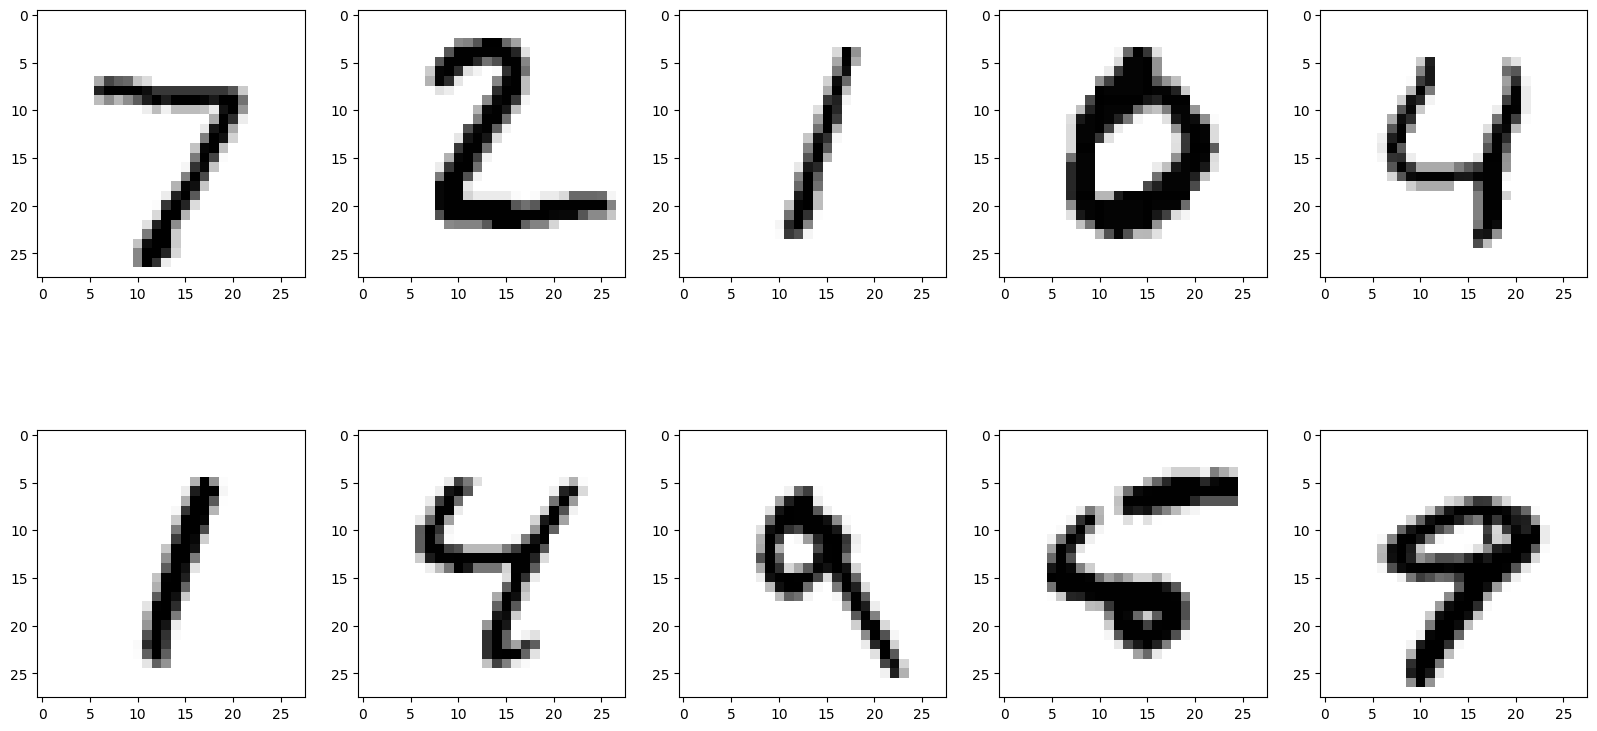

[array([[2.40075494e-09],
       [8.82459004e-06],
       [7.48083890e-06],
       [6.93156529e-04],
       [1.37298656e-09],
       [6.03285263e-12],
       [2.09372244e-12],
       [9.99996312e-01],
       [3.78065703e-09],
       [1.17941592e-05]]), 7, 7]
[array([[2.61948080e-07],
       [4.09571637e-05],
       [9.97204451e-01],
       [1.47305563e-05],
       [6.86045664e-11],
       [3.19169142e-06],
       [7.79746854e-05],
       [5.18395506e-09],
       [5.55740414e-05],
       [3.34499235e-10]]), 2, 2]
[array([[1.97866575e-09],
       [9.99953115e-01],
       [2.04463041e-06],
       [1.45665332e-03],
       [1.17445018e-07],
       [4.85763344e-18],
       [5.41588464e-07],
       [2.57067345e-06],
       [6.66611513e-05],
       [3.40998579e-09]]), 1, 1]
[array([[9.99991825e-01],
       [1.53659601e-05],
       [4.54176595e-09],
       [3.62018726e-07],
       [2.03297154e-11],
       [3.34891093e-04],
       [1.68943188e-04],
       [9.56370097e-06],
       [7.63788317e-07

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# display the first ten test_data images
fig, axs = plt.subplots(2, 5, figsize=(20,10))
i = 0
for r in range(2):
  for c in range(5):
    test_img = np.reshape(test_data[i][0], (28,28))
    axs[r][c].imshow(test_img, cmap='gray_r', vmin=0, vmax=1)
    i += 1
plt.show()

# print the "activations" passing the first 10 test_data images into the trained network along with the "prediction" (i.e., np.argmax(a)) and the label "test_data[i][1]"
for i in range(10):
  a = net.feedforward(test_data[i][0])
  print([a, np.argmax(a), test_data[i][1]])

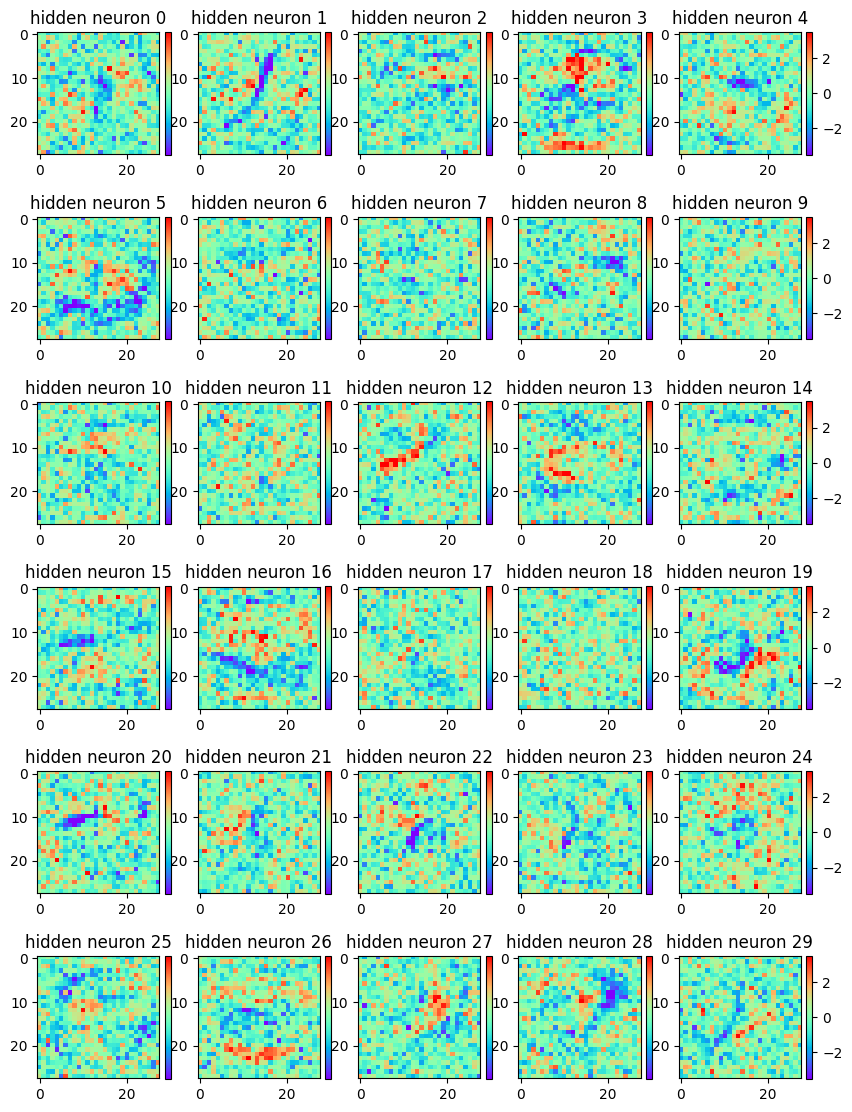

In [ ]:
# now let's do this as a heatmap that maintains the 2d nature of the input pixels and plot ALL weights from the input layer to ALL 30 of the hidden neurons
xi = range(28)
yi = range(28)
fig,axes = plt.subplots(6, 5, figsize=(10,14))

i = 0
for r in range(6):
    for c in range(5):
        ax = axes[r][c]
        ax.set_title(f"hidden neuron {i}")
        zi = np.reshape(net.weights[0][i],(28,28))
        cax = ax.imshow(zi, cmap='rainbow', interpolation='nearest', origin="upper", vmin=-3.5, vmax=3.5)
        cb = fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
        if c != 4:
          cb.set_ticks([])
        i += 1